In [1]:
import matplotlib
from matplotlib.colors import ListedColormap

from matplotlib import cm
import os, sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.insert(0,'..')
from analysis.analysis_utils import *
pltcolors, pltcolors_alt = steffiscolours()

import pickle

### Simulation

In [2]:


def get_phase_order(freq,isi):
    data = pickle.load(open("../data/order_pred.pkl",'rb'))    
    freqs = data['freqs']
    isis = data['isis']
    result = data['result']
    i = arg_is_close(freqs,freq)
    j = arg_is_close(isis,isi-200)
    r = int(result[i,j])
    orders = np.array([[3,1,2],[1,3,2],[3,2,1],[2,3,1],[1,2,3],[2,1,3]])
    return r,orders[r]


In [3]:
# Generate plot through simulation. Borders can also be calculated analytically
# so there likely is a more efficient way to generate this plot
load = True

orders = np.array([[3,1,2],[1,3,2],[3,2,1],[2,3,1],[1,2,3],[2,1,3]])

if load:
    data = pickle.load(open("../data/order_pred.pkl",'rb'))    
    freqs = data['freqs']
    isis = data['isis']
    result = data['result']
else:
    dt = .1 # time step in ms
    stim_len = 200 # stimulus time in ms
    trial_len = 6000 # simulation time in ms
    n_stim = 4 # number of stimuli

    t = np.arange(0,trial_len, dt)
    freqs = np.arange(0.1,10,0.01) #frequencies
    isis = np.arange(0,550,1) #interstimulus intervals
    result = np.zeros((len(isis),len(freqs)))
    add_offs = 0

    for x, isi in enumerate(isis):
        for y, freq in enumerate(freqs):

            delay_start = int((stim_len*n_stim+isi*(n_stim-1))/dt)
            delay_end =delay_start + int(1000/(freq*dt))
            sine = np.sin((t/1000)*freq*np.pi*2)
            pred_current = np.zeros((n_stim ,len(t)))
            start = 0
            for i in range(n_stim):
                pred_current[i,start:]=sine[:len(pred_current[i,start:])]
                start += int((stim_len+isi+add_offs*i)/dt)
            phase_order = np.argsort(np.argmax(pred_current[:,delay_start:delay_end], axis = 1))
            while phase_order[0]!=0:
                phase_order = np.roll(phase_order, 1)
            phase_order = phase_order[1:]
            index = np.where((phase_order==orders).all(axis=1))
            result[x,y] = index[0][0]
    data = {"freqs":freqs,
       "isis":isis,
       "result":result}

    pickle.dump(data, open("../data/order_pred.pkl",'wb'))

### Create plot

[0.5 1.5 2.5 3.5 4.5]


/opt/homebrew/Caskroom/miniforge/base/envs/PhaseC/lib/python3.10/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


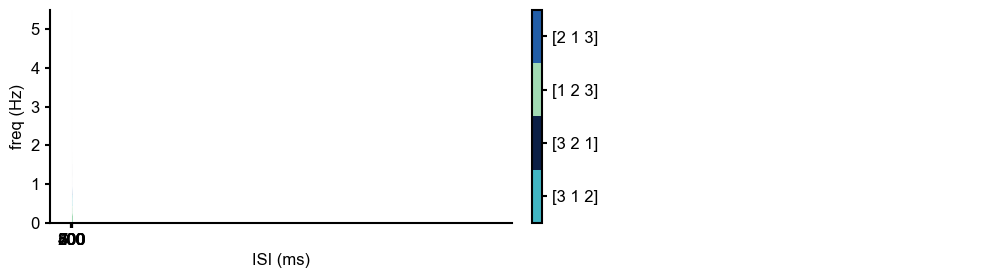

In [8]:
col_dict={1:pltcolors_alt[1],
          2:pltcolors_alt[3],
          3:pltcolors_alt[0],
          4:pltcolors_alt[2]}
# create a colormap
cm = ListedColormap([col_dict[x] for x in col_dict.keys()])

#  description of each category
labels = np.array([orders[0],orders[2],orders[4],orders[5]])
len_lab = len(labels)


norm_bins = np.sort([*col_dict.keys()]) + 0.5
norm_bins = np.insert(norm_bins, 0, np.min(norm_bins) - 1.0)
print(norm_bins)

norm = matplotlib.colors.BoundaryNorm(norm_bins, len_lab, clip=True)
fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: labels[norm(x)])

# Plot our figure
fig = plt.figure(figsize = (10,3))
gs = fig.add_gridspec(1, 3, width_ratios=[3.5, 0.5,1.5])  # , left=0, right=1,

res4 = np.copy(result)
res4+=.5
res4[result>1]-=1
res4[result>2]-=1
ax=[[],[]]
ax[0] = fig.add_subplot(gs[0])
ax[1] = fig.add_subplot(gs[2])

im = ax[0].imshow(res4.T, cmap=cm, norm=norm,aspect='auto')

ax[0].set_yticks(np.arange(len(freqs))[::100])
ax[0].set_yticklabels(["{:.0f}".format(fr) for fr in freqs[::100]])
ax[0].set_ylabel("freq (Hz)")
ax[0].set_xticks(np.arange(len(isis))[::100])
ax[0].set_xticklabels(["{:.0f}".format(isi+200) for isi in isis[::100]])
ax[0].set_xlabel("ISI (ms)")
ax[1].axis('off')
diff = norm_bins[1:] - norm_bins[:-1]
tickz = norm_bins[:-1] + diff / 2
cb = plt.colorbar(im, format=fmt, ticks=tickz,fraction=0.024, pad=0.04,ax = ax[0])
fig.tight_layout()


for i in range(20):
    ax[0].plot(1000*i/(freqs*3)-200,np.arange(len(freqs)),color='white',lw=0.5)
for i in range(20):
    ax[0].plot(1000*i/(freqs*2)-200,np.arange(len(freqs)),color='white',lw=0.5)
for i in range(20):
    ax[0].plot(1000*i/(freqs)-200,np.arange(len(freqs)),color='white',lw=0.5)
ax[0].set_ylim(0,len(res4))


#ax[0].axvline(373)
#ax[0].axvline(275)
#ax[0].axvline(204)
#ax[0].axvline(150)

m4 = "o"
m3 = "v"
m2 = "s"
m1 = "*"

s = 0

ax[0].scatter(arg_is_close(3.73,freqs),arg_is_close(400,(isis+200)),color='red',s=s,marker=m1)
ax[0].scatter(arg_is_close(2.75,freqs),arg_is_close(400,(isis+200)),color='red',s=s,marker=m2)
ax[0].scatter(arg_is_close(2.04,freqs),arg_is_close(400,(isis+200)),color='red',s=s,marker=m3)
ax[0].scatter(arg_is_close(1.5,freqs),arg_is_close(400,(isis+200)),color='red',s=s,marker=m4)


ax[0].scatter(arg_is_close(3.73,freqs),arg_is_close(500,(isis+200)),color='pink',s=s,marker=m1)
ax[0].scatter(arg_is_close(2.75,freqs),arg_is_close(500,(isis+200)),color='pink',s=s,marker=m2)
ax[0].scatter(arg_is_close(2.04,freqs),arg_is_close(500,(isis+200)),color='pink',s=s,marker=m3)
ax[0].scatter(arg_is_close(1.5,freqs),arg_is_close(500,(isis+200)),color='pink',s=s,marker=m4)


ax[0].scatter(arg_is_close(3.73,freqs),arg_is_close(250,(isis+200)),color='orange',s=s,marker=m1)
ax[0].scatter(arg_is_close(2.75,freqs),arg_is_close(250,(isis+200)),color='orange',s=s,marker=m2)
ax[0].scatter(arg_is_close(2.04,freqs),arg_is_close(250,(isis+200)),color='orange',s=s,marker=m3)
ax[0].scatter(arg_is_close(1.5,freqs),arg_is_close(250,(isis+200)),color='orange',s=s,marker=m4)


#ISIs=[250,400,500]
#for ISI in ISIs:
#    ax[0].axhline(ISI-200)
plt.rcParams["pdf.use14corefonts"] = True


plt.savefig("../figures/model_phaseorders_pred.pdf", facecolor='white')
plt.savefig("../figures/model_phaseorders_pred.png", facecolor='white')


In [5]:
isis+200

array([200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,
       213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,
       226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238,
       239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251,
       252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264,
       265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277,
       278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290,
       291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303,
       304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316,
       317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329,
       330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342,
       343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355,
       356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368,
       369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 38

In [6]:
arg_is_close(0.11,freqs)

1

array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08,
       1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19,
       1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 ,
       1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41,
       1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52,
       1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.

In [36]:
dat = [[] for _ in range(120)]
dat[2].append(3)

In [38]:
dat[2][0]

3

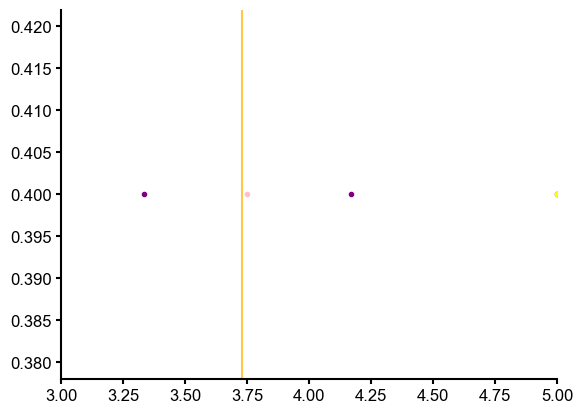

In [51]:
isi = 0.4
for i in range(20):
    plt.scatter(i/(isi*3),isi,color='purple')
for i in range(20):
    plt.scatter(i/(isi*2),isi,color='pink')
for i in range(20):
    plt.scatter(i/(isi*1),isi,color='yellow')
plt.xlim(3,5)
plt.axvline(3.73)